#Playing around with NumPy and img

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Making a greyscaled image

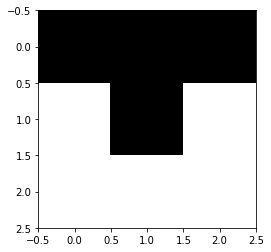

In [ ]:
#0 = black
#255= white
one = np.array([[0,0,0],
         [255,0,255],
         [255,255,255]])

plt.imshow(one,cmap='gray')

#Making rgb image

(3, 2, 3)

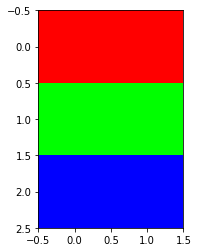

In [ ]:
#[R,G,B]
color = np.array([
                  [[255,0,0],[255,0,0]],
                  [[0,255,0],[0,255,0]],
                  [[0,0,255],[0,0,255]]
                   ])
plt.imshow(color)
color.shape

#Turning an image to an array

##Fetching dataset from kaggle

In [ ]:
#Upload kaggle api key json file here
from google.colab import files
files.upload()

print('Uploaded!')

Saving kaggle.json to kaggle.json
Uploaded!


##Configure kaggle to be used in Google Colab##


In [ ]:
!mkdir -p ~/.kaggle
#making directory in our environment called kaggle
!cp kaggle.json ~/.kaggle/
#copying kaggle.json file into our kaggle directory
!chmod 600 ~/.kaggle/kaggle.json
#setting permission:  (U)ser / owner can read, can write and can't execute. ( G)roup can't read, can't write and can't execute. ( O)thers can't read, can't write and can't execute.


!ls ~/.kaggle
#this is suppose to be a seperate cell

!pip install -q kaggle
!pip install -q kaggle-cli
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

kaggle.json
     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 5.3MB 6.6MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 133kB 30.8MB/s 
     |████████████████████████████████| 112kB 46.2MB/s 
100% 3.58G/3.58G [00:44<00:00, 69.7MB/s]
100% 3.58G/3.58G [00:44<00:00, 86.8MB/s]



## Unzip our dataset :) 

In [ ]:
import zipfile
with zipfile.ZipFile('/content/fruits-fresh-and-rotten-for-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/fruits')
!mkdir -p /content/final/train
!mkdir -p /content/final/test
#making directory
!mv /content/fruits/dataset/train/freshapples /content/final/train
!mv /content/fruits/dataset/train/rottenapples /content/final/train

!mv /content/fruits/dataset/test/freshapples /content/final/test
!mv /content/fruits/dataset/test/rottenapples /content/final/test
#moving the files to our newly created diretctory

!rm -r /content/fruits
#removing oroginal dataset, since we dont need them no more sir

## opening 1 image from our dataset

(476, 458, 4)


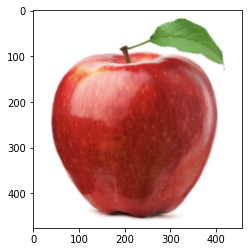

In [ ]:
from PIL import Image

img = Image.open('/content/final/train/freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png')
imgArr = np.array(img)
print(imgArr.shape)
plt.imshow(imgArr)

#print(imgArr)

##Preprocessing 1 image

In [ ]:
imgs = []
path = '/content/final/train/freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png'
img = Image.open(path).convert('L')
img = img.resize((150,150))
imgArr = np.array(img)
imgs.append(imgArr)

#Making the Preprocessed arrays so they dont have to do so on the first day :)

In [ ]:
#making a preprocess x and y array, for students to just copy and paste
import os
xArr = []
yArr = []
#for fresh fruit y=0
for filename in os.listdir('/content/final/train/freshapples'):
    path = '/content/final/train/freshapples/' + filename
    img = Image.open(path).convert('L')
    img = img.resize((150,150))
    imgArr = np.array(img)
    xArr.append(imgArr)
    yArr.append(0)

#for fresh fruit y=1
for filename in os.listdir('/content/final/train/rottenapples'):
    path = '/content/final/train/rottenapples/' + filename
    img = Image.open(path).convert('L')
    img = img.resize((150,150))
    imgArr = np.array(img)
    xArr.append(imgArr)
    yArr.append(1)

xArrNp = np.array(xArr)
yArrNp = np.array(yArr)

xArrNp.shape
#4035 samples 


(4035, 150, 150)

In [ ]:
xArrNpFlatten = xArrNp.reshape((4035,150*150))
xArrNpFlatten.shape

(4035, 22500)

In [ ]:
print(xArrNpFlatten)

np.save('trainingfeatures.npy',xArrNpFlatten)
np.save('traininglabels.npy',yArrNp)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 248 248 249]
 [  0   0   0 ...   0   0   0]]


#Loading the preprocessed Dataset

In [ ]:
import numpy as np

In [ ]:
xArr = np.load('/content/trainingfeatures.npy')
yArr = np.load('/content/traininglabels.npy')

print(xArr.shape)
print(yArr.shape)

(4035, 22500)
(4035,)


In [ ]:
#Training model with out preprocessed Dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xArr,yArr)
model.score(xArr,yArr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8163568773234201

#Using Trained Model to classify fruit


 Rotten


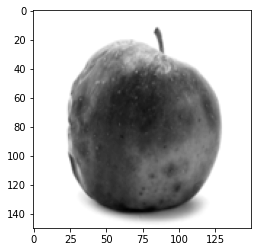

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
decode = ['Fresh','Rotten']
img = Image.open('/content/final/test/rottenapples/Screen Shot 2018-06-07 at 2.20.04 PM.png').convert('L')
img = img.resize((150,150))
imgArr = np.array(img)
plt.imshow(imgArr, cmap='gray')

#Give shape (1, 22500)
imgArr_flat = imgArr.reshape((1,-1))

preds = model.predict(imgArr_flat)[0]
print("\n",decode[preds])


##Predicting own Images##

Saving 860c87fa35257ded7c8966add51ed0fa.jpg to 860c87fa35257ded7c8966add51ed0fa.jpg
Rotten


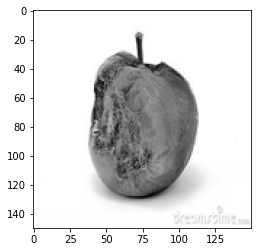

In [ ]:
from google.colab import files
uploaded = files.upload()
 
for filename in uploaded.keys():
  img = Image.open(filename).convert('L')
  img = img.resize((150,150))
  imgArr = np.array(img)
  plt.imshow(imgArr, cmap='gray')

  #Give shape (1, 22500)
  imgArr_flat = imgArr.reshape((1,22500))

  preds = model.predict(imgArr_flat)[0]
  print(decode[preds])